# **Compare two vs. three labels**

## **Debagree Data**

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix,
                            f1_score, balanced_accuracy_score)
from sklearn.metrics import precision_recall_fscore_support


In [11]:
data_two = pd.read_csv("two_label_debagree/output/Llama_3.3_70B_zs_Debagree_2labels_sample.csv")
data_three = pd.read_csv("three_label_debagree/output/Llama_3.3_70B_zs_Debagree_3labels_sample.csv")

In [12]:
data_two = data_two[["msg_id_parent", "msg_id_child", "subreddit", "label_2", "predicted_chat"]].rename(columns = {'label_2': "label_two", "predicted_chat" : "predicted_two"})
data_two

,msg_id_parent,msg_id_child,subreddit,label_two,predicted_two
0,gqak9tq,gqalvak,democrats,no_disagreement,no_disagreement
1,ghrt3ay,ghw66nh,Republican,no_disagreement,no_disagreement
2,gfask7y,gfav46i,Brexit,no_disagreement,no_disagreement
3,gyj4rst,gyk1wwh,Republican,no_disagreement,no_disagreement
4,g7xuo23,g7y3wdy,Republican,disagree,no_disagreement
...,...,...,...,...,...
9995,fgdpkdc,fgdsys2,democrats,no_disagreement,no_disagreement
9996,gb4idfe,gb4ofe7,Republican,no_disagreement,no_disagreement
9997,fogwj8w,foie0e3,Republican,no_disagreement,no_disagreement
9998,g82yc73,g830mfp,Republican,no_disagreement,no_disagreement


In [15]:
data_three['predicted_three'] = data_three['predicted_labels'].apply(lambda x: x.split()[-1])
data_three = data_three.rename(columns = {'label': "label_three"})
data_three.drop(columns = 'predicted_labels', inplace = True)
data_three

,msg_id_parent,msg_id_child,subreddit,label_three,predicted_three
0,gqak9tq,gqalvak,democrats,agree,agree
1,ghrt3ay,ghw66nh,Republican,agree,neutral
2,gfask7y,gfav46i,Brexit,agree,agree
3,gyj4rst,gyk1wwh,Republican,agree,neutral
4,g7xuo23,g7y3wdy,Republican,disagree,disagree
...,...,...,...,...,...
9995,fgdpkdc,fgdsys2,democrats,agree,agree
9996,gb4idfe,gb4ofe7,Republican,neutral,does
9997,fogwj8w,foie0e3,Republican,agree,agree
9998,g82yc73,g830mfp,Republican,agree,agree


In [30]:
data = pd.merge(data_two, data_three)
data

,msg_id_parent,msg_id_child,subreddit,label_two,predicted_two,label_three,predicted_three
0,gqak9tq,gqalvak,democrats,no_disagreement,no_disagreement,agree,agree
1,ghrt3ay,ghw66nh,Republican,no_disagreement,no_disagreement,agree,neutral
2,gfask7y,gfav46i,Brexit,no_disagreement,no_disagreement,agree,agree
3,gyj4rst,gyk1wwh,Republican,no_disagreement,no_disagreement,agree,neutral
4,g7xuo23,g7y3wdy,Republican,disagree,no_disagreement,disagree,disagree
...,...,...,...,...,...,...,...
9995,fgdpkdc,fgdsys2,democrats,no_disagreement,no_disagreement,agree,agree
9996,gb4idfe,gb4ofe7,Republican,no_disagreement,no_disagreement,neutral,does
9997,fogwj8w,foie0e3,Republican,no_disagreement,no_disagreement,agree,agree
9998,g82yc73,g830mfp,Republican,no_disagreement,no_disagreement,agree,agree


In [37]:
def get_valid_share_and_performance(df, true_col, pred_col, valid_responses):

    share = len(df[df[pred_col].isin(valid_responses)]) / len(df)
    print("Valid Share of Responses: ", share)

    valid_df = df[df[pred_col].isin(valid_responses)]

    # performance
    y_test = valid_df[true_col]
    y_pred = valid_df[pred_col]
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))

    
    return valid_df


In [38]:
valid_reponses_two = ['disagree', 'no_disagreement']
get_valid_share_and_performance(data, "label_two", "predicted_two", valid_reponses_two)

Valid Share of Responses:  1.0
Confusion Matrix:
[[1624 2332]
 [ 697 5347]]

Classification Report:
                 precision    recall  f1-score   support

       disagree       0.70      0.41      0.52      3956
no_disagreement       0.70      0.88      0.78      6044

       accuracy                           0.70     10000
      macro avg       0.70      0.65      0.65     10000
   weighted avg       0.70      0.70      0.68     10000

Balanced Accuracy Score: 0.6475973464562872
Accuracy Score: 0.6971


,msg_id_parent,msg_id_child,subreddit,label_two,predicted_two,label_three,predicted_three
0,gqak9tq,gqalvak,democrats,no_disagreement,no_disagreement,agree,agree
1,ghrt3ay,ghw66nh,Republican,no_disagreement,no_disagreement,agree,neutral
2,gfask7y,gfav46i,Brexit,no_disagreement,no_disagreement,agree,agree
3,gyj4rst,gyk1wwh,Republican,no_disagreement,no_disagreement,agree,neutral
4,g7xuo23,g7y3wdy,Republican,disagree,no_disagreement,disagree,disagree
...,...,...,...,...,...,...,...
9995,fgdpkdc,fgdsys2,democrats,no_disagreement,no_disagreement,agree,agree
9996,gb4idfe,gb4ofe7,Republican,no_disagreement,no_disagreement,neutral,does
9997,fogwj8w,foie0e3,Republican,no_disagreement,no_disagreement,agree,agree
9998,g82yc73,g830mfp,Republican,no_disagreement,no_disagreement,agree,agree


In [48]:
valid_reponses_three = ['disagree', 'agree', 'neutral']

valid_three = get_valid_share_and_performance(data, "label_three", "predicted_three", valid_reponses_three)


Valid Share of Responses:  0.7933
Confusion Matrix:
[[1498  553  775]
 [ 206 2231  900]
 [ 255  463 1052]]

Classification Report:
              precision    recall  f1-score   support

       agree       0.76      0.53      0.63      2826
    disagree       0.69      0.67      0.68      3337
     neutral       0.39      0.59      0.47      1770

    accuracy                           0.60      7933
   macro avg       0.61      0.60      0.59      7933
weighted avg       0.65      0.60      0.61      7933

Balanced Accuracy Score: 0.5976642366660675
Accuracy Score: 0.6026723811924871


In [49]:

def print_cm(df, pred_col, true_col):
    print(df[true_col].value_counts())
    
    
    cm = confusion_matrix(df[true_col], df[pred_col])
    labels = sorted(set(df[true_col]).union(set(df[pred_col])))
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix: {pred_col}")
    
    plt.show()

label_two
no_disagreement    6044
disagree           3956
Name: count, dtype: int64


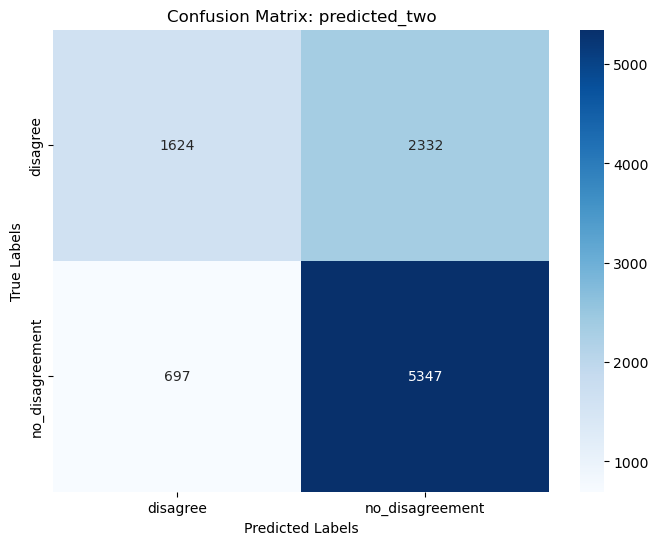

In [42]:
print_cm(data, 'predicted_two', "label_two")

label_three
disagree    3337
agree       2826
neutral     1770
Name: count, dtype: int64


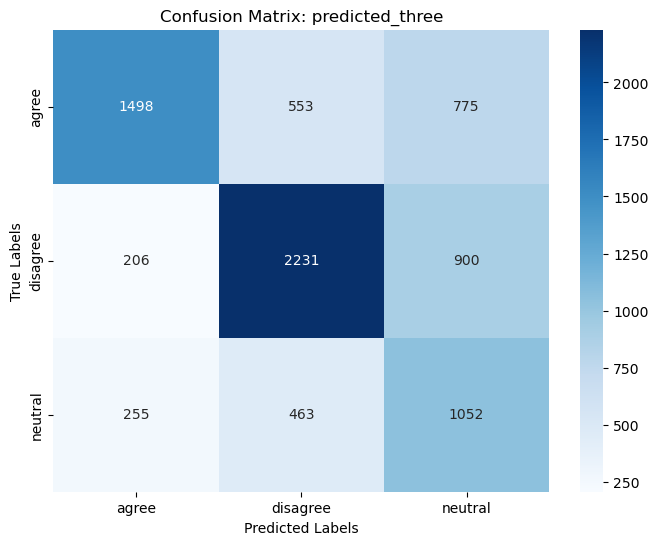

In [50]:

print_cm(valid_three, 'predicted_three', "label_three")